The data in [wine.csv](../data/wine.csv) contains information on 11 chemical properties of 6500 different bottles of _vinho verde_ wine from northern Portugal.  In addition, two other variables about each wine are recorded:
- whether the wine is red or white  
- the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.  

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results.  Which dimensionality reduction technique makes the most sense to you for this data?  Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties.  Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines?  Present appropriate numerical and/or visual evidence to support your conclusions.  

To clarify: I'm not asking you to run a supervised learning algorithms.  Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties.  This should be straightforward to assess using plots.  


In [ ]:
!pip3 install numpy pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wineData = pd.read_csv("data/wine.csv")
wineData.head() ################ first 5 records

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# Separate the features and labels
X = wineData.drop("color", axis=1)
y = wineData["color"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Initialize PCA with desired number of components (e.g., 2)
pca = PCA(n_components=6)

# Fit and transform the data using PCA
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2","PC3","PC4","PC5","PC6"])
principal_df


,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602
...,...,...,...,...,...,...
6492,0.112718,-1.912247,-0.061138,-0.178780,-0.420338,-0.455627
6493,1.720296,1.009571,-0.662488,-0.288730,-0.767561,0.142545
6494,0.626922,-0.622145,-0.149483,-1.147584,-0.384530,0.650525
6495,0.491934,-3.755928,-0.080284,0.002032,0.235215,-0.109871


In [9]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

cumulative_variance = np.cumsum(explained_variance)

print("Cumulative Explained Variance Ratios:", cumulative_variance)

Explained Variance Ratios: [0.25346226 0.22082117 0.13679223 0.0890521  0.07004171 0.05503326]
Cumulative Explained Variance Ratios: [0.25346226 0.47428343 0.61107566 0.70012777 0.77016947 0.82520274]


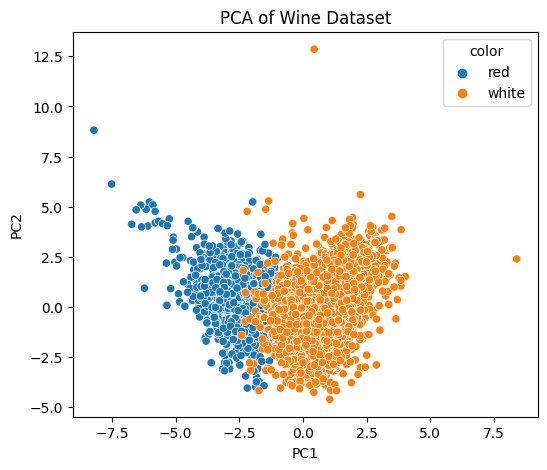

In [10]:
final_df = pd.concat([principal_df, y], axis=1)

plt.figure(figsize=(6, 5))
sns.scatterplot(x="PC1", y="PC2", hue="color", data=final_df)
plt.title("PCA of Wine Dataset")
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 8

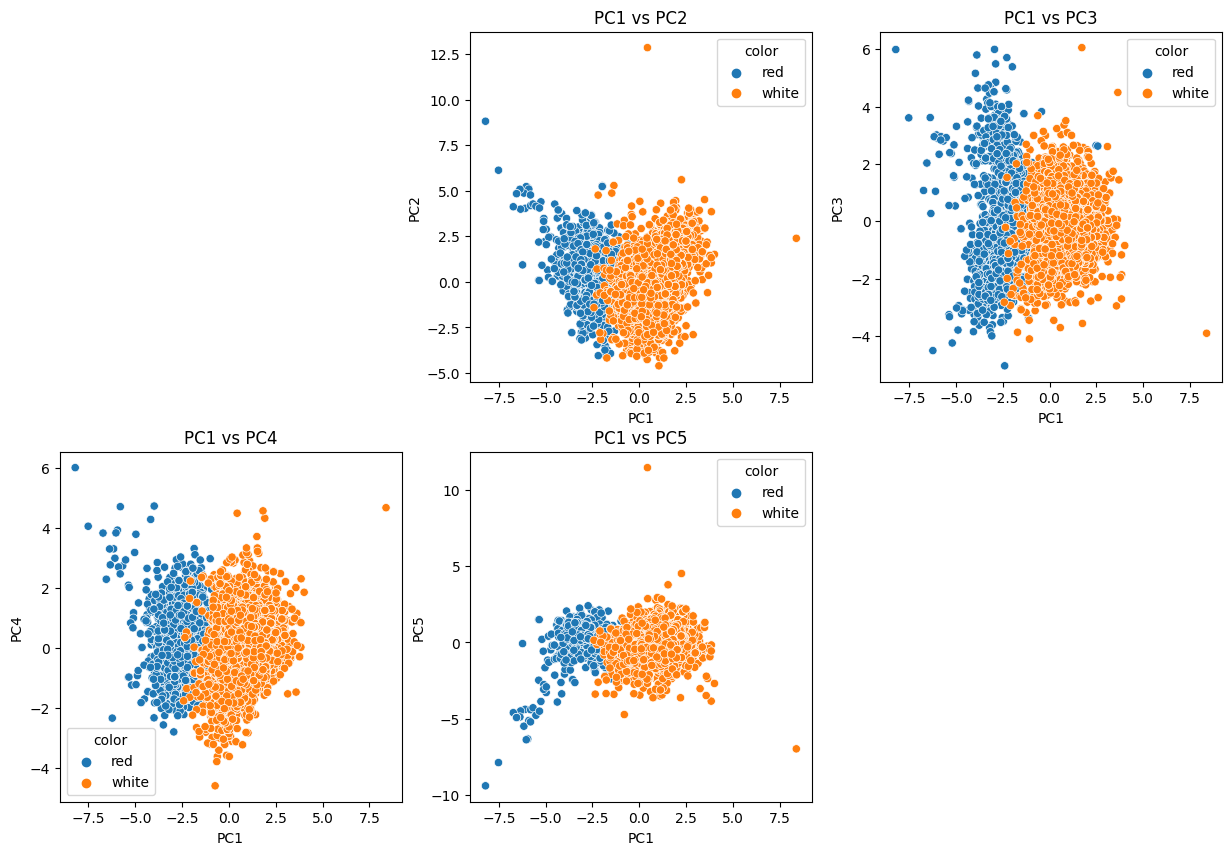

In [11]:
# colors = {'class_1': 'red', 'class_2': 'yellow', 'class_3': 'blue'}
# principal_df['color'] = principal_df['class'].map(colors)

# Plot subplots of different PC combinations
plt.figure(figsize=(15, 10))

for i in range(1, 5):  # Loop through PC combinations (PC1-PC2, PC1-PC3, ..., PC4-PC5)
    for j in range(i + 1, 6):
        plt.subplot(2, 3, (i-1)*5 + j)  # Create subplots
        sns.scatterplot(x=f"PC{i}", y=f"PC{j}", hue="color", data=final_df) #, palette=colors)
        plt.title(f"PC{i} vs PC{j}")

plt.tight_layout()
plt.show()